In [1]:
#import required lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:

df=pd.read_csv('1_boston_housing.csv')

In [3]:
#show dataset
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [56]:
#check for null values in the dataset

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
#Assign Independent Features

X=df.iloc[:,:13]
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
#Assign Dependent Features

Y=df.iloc[:,-1].values.reshape(-1,1)
Y.shape

(506, 1)

<Axes: >

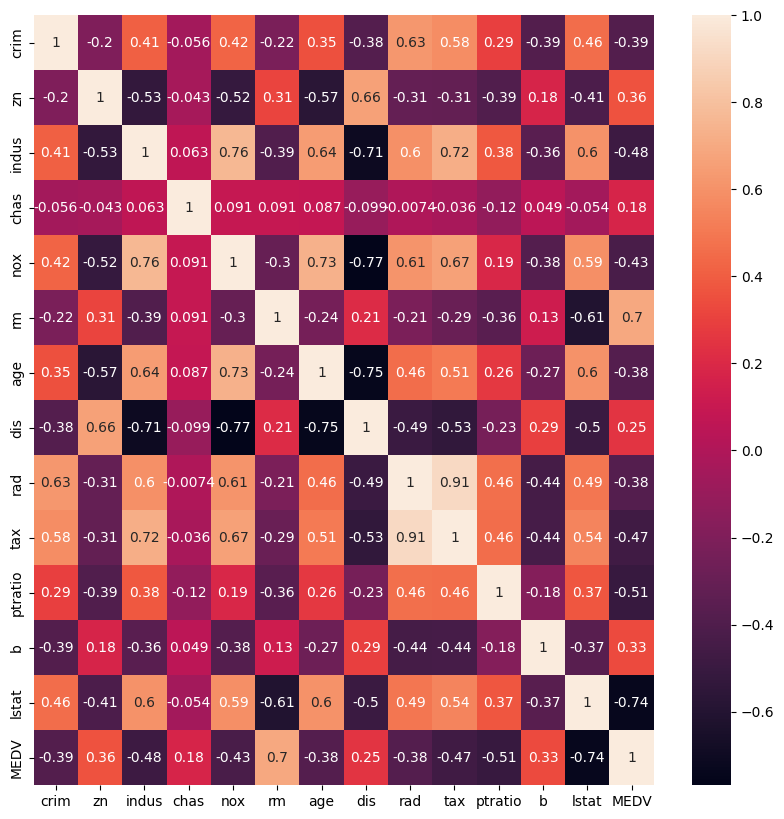

In [7]:
#Draw Heatmap for Coorelation

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'LSTAT')

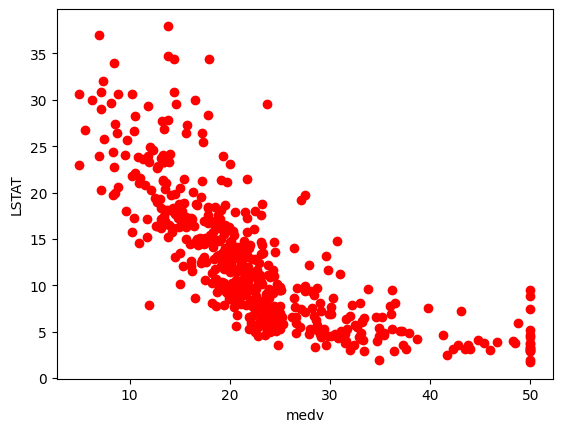

In [8]:
#Scatter Plot to Understand Relation

plt.scatter(df['MEDV'],df['lstat'],color='red')
plt.xlabel('medv')
plt.ylabel('LSTAT')

Text(0, 0.5, 'RM')

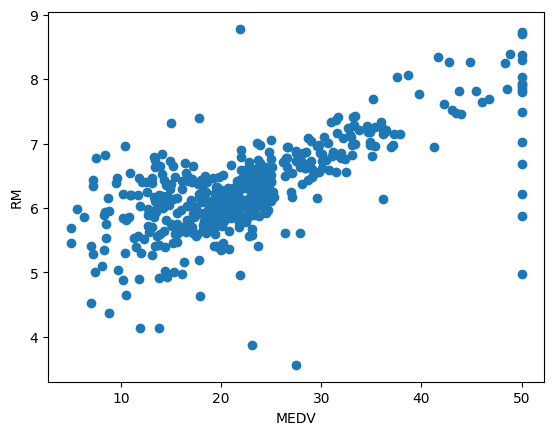

In [9]:
plt.scatter(df['MEDV'],df['rm'])
plt.xlabel('MEDV')
plt.ylabel('RM')

C:\Users\Pankaj More\AppData\Local\Temp\ipykernel_31312\2516366307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'])


<Axes: xlabel='MEDV', ylabel='Density'>

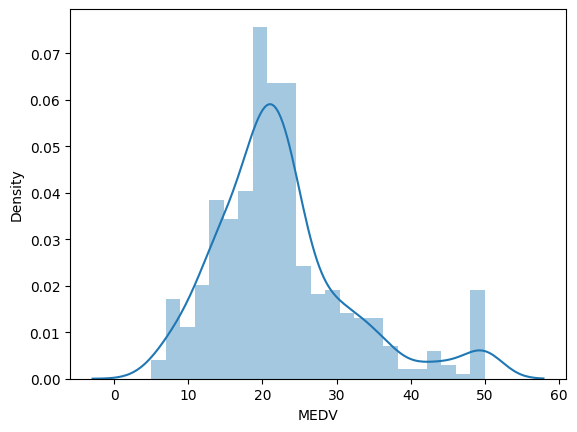

In [10]:
#To understand distributionn of data (Spread Around mean) (to Identify Outliers)
sns.distplot(df['MEDV'])

<Axes: ylabel='MEDV'>

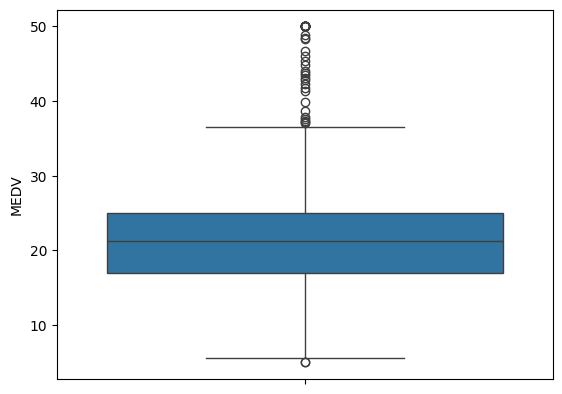

In [11]:
sns.boxplot(df['MEDV'])

In [12]:
#Scaling for Normlization
sc=StandardScaler()
X=sc.fit_transform(X)

In [13]:
#Train test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2)

In [14]:

model = Sequential()

model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])
#adam Optimmizer is used to reduce gradeint descent

C:\Users\Pankaj More\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history=model.fit(X_train,Y_train,epochs=100,verbose=0,validation_split=0.2)

In [16]:

Y_pred=model.predict(X_test)
r2_score(Y_test,Y_pred)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


0.8787054390562967

In [17]:
#External data for testing
new_data = sc.fit_transform(([[0.1, 10.0,4.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]))
prediction = model.predict(new_data)
print("Predicted house price:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted house price: [[9.655739]]
